In [1]:
import pandas as pd
import numpy as np
import random 
import statistics 
from decimal import Decimal
import seaborn as sns


import matplotlib.pyplot as plt

In [2]:
def warmup_Wsystem(N, a_1, b_1, arrival_rate_1, a_2, b_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Queue = 0 
    Q_num = 0
    Queue_name = []
    AreaQ = 0
    AreaP = 0
   
    
    # PLotting Parameters for experiment 
    x = []
    y_People = []
    y_Queue = []
    y_Abandon = []
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        
    
    # Service Rate 1 
    servicerate_1 = {}
    for server in free_servers:
        # Does the uniform function include b ?
        servicerate_1.update({ server : random.uniform(a_1,b_1)}) 
        
    #  Setting up service completion rates
    servicerate_2 = {}
    for server in free_servers:
        # Does the uniform function include b ?
        servicerate_2.update({ server : random.uniform(a_2,b_2)})
        

    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s]:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s]:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)
    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
    
 
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
    
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
    
        # For termination analysis
        x.append(TNOW)
        y_People.append(AreaP/TNOW)
        y_Queue.append(AreaQ/TNOW)
        y_Abandon.append(Abandon/TNOW)
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1

    
            if Class_2 + Class_1 == []:
                Queue += 1
                Q_num += 1
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num +=1
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        next_served = type_1[0]
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)   
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        next_served = type_2[0]
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])

                    else:
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
           
        
    return y_Abandon, y_People, y_Queue, x
    
    
    

In [53]:
def warmup_iterations(N, termination):
    Iteration= []

    # Generating 20 different iterations for different service rates 
    for i in range(0,5):
        Iteration.append( warmup_Wsystem(2*N, 0, 2, N, 0, 2, N, 0.5, termination, 1 , 0.5, 1, -0.5))
        x = Iteration[i][3]
        y = Iteration[i][1]
        Y_1 = Iteration[i][2]
        z = Iteration[i][0]
        
        plt.figure(i)
        plt.figure(figsize=(8, 4))
        plt.plot(x,y)
        plt.xlabel("Time", fontsize = 10)
        plt.ylabel("Average People in the System", fontsize = 10)
        plt.show()
        
        plt.figure(figsize=(8,4))
        plt.plot(x,Y_1)
        plt.xlabel("Time", fontsize = 10)
        plt.ylabel("Average Queue Length in the System", fontsize = 10)
        plt.axis([0,termination,0,max(Y_1)+0.1])
        plt.show()
        
        plt.figure(figsize=(8,4))
        plt.plot(x, z)
        plt.xlabel("Time", fontsize = 10)
        plt.ylabel("Abandonment in the System", fontsize = 10)
        plt.axis([0,termination,0,max(z)+0.1])
        plt.show()

<Figure size 432x288 with 0 Axes>

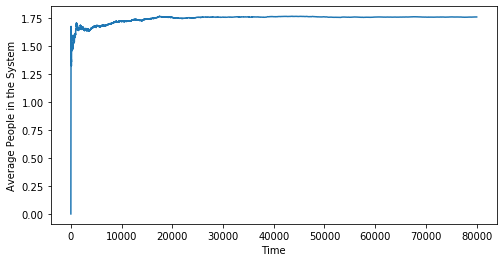

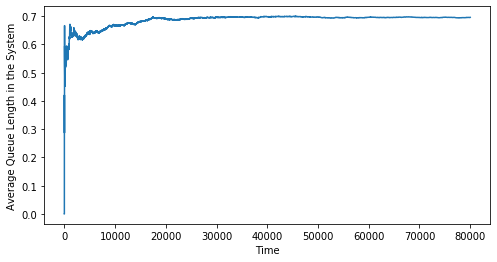

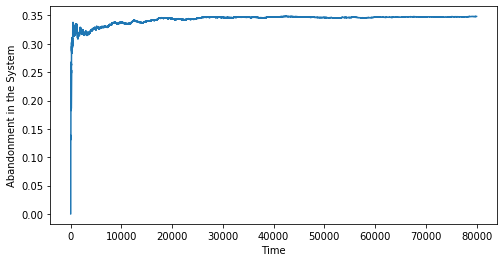

<Figure size 432x288 with 0 Axes>

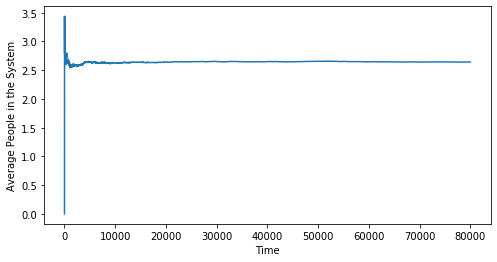

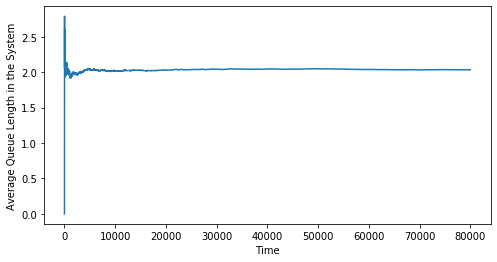

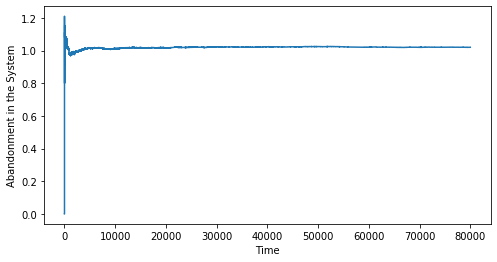

<Figure size 432x288 with 0 Axes>

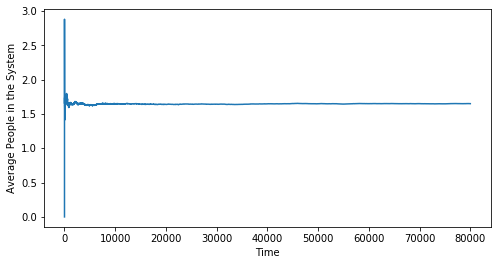

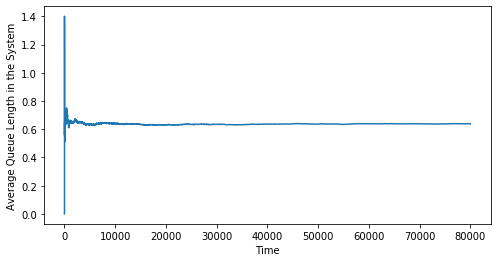

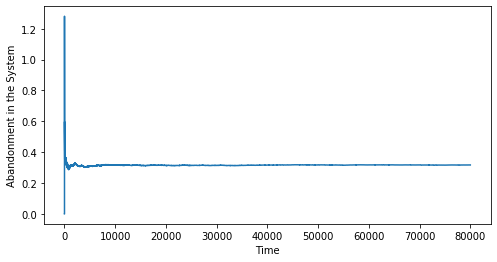

<Figure size 432x288 with 0 Axes>

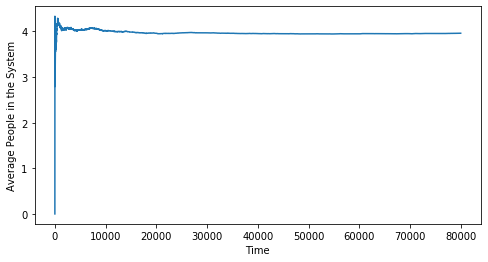

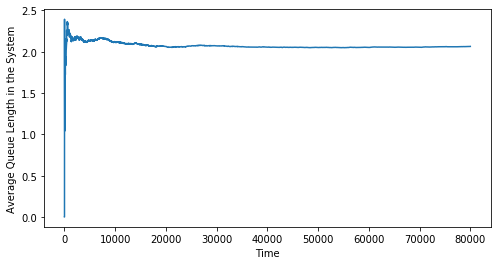

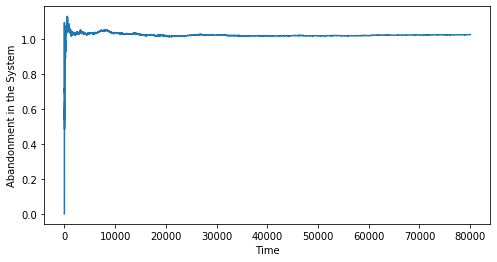

<Figure size 432x288 with 0 Axes>

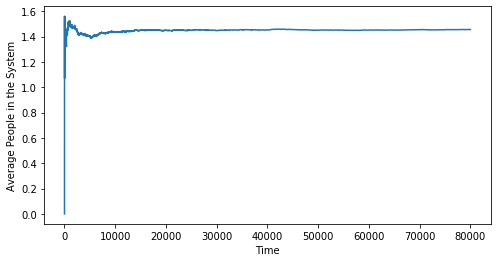

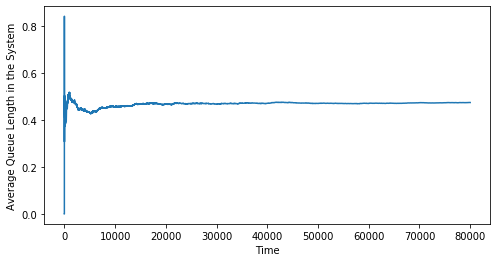

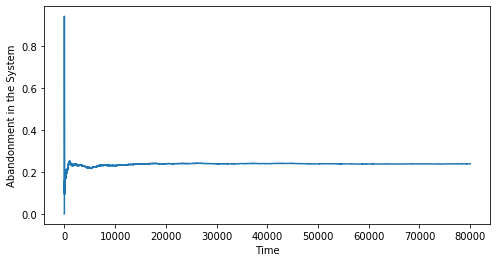

<Figure size 432x288 with 0 Axes>

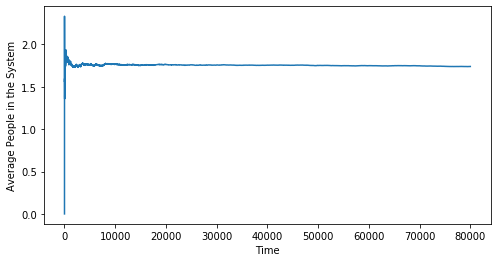

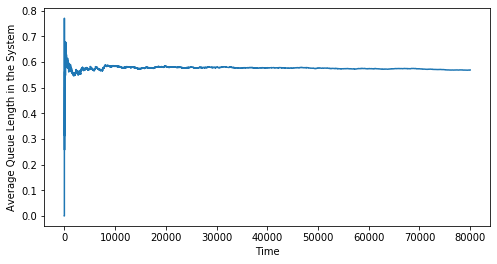

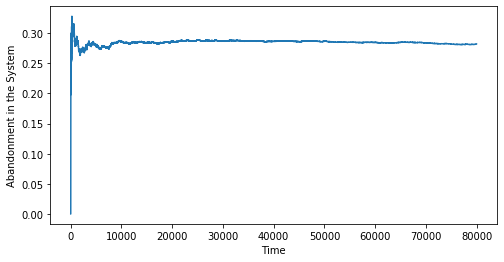

<Figure size 432x288 with 0 Axes>

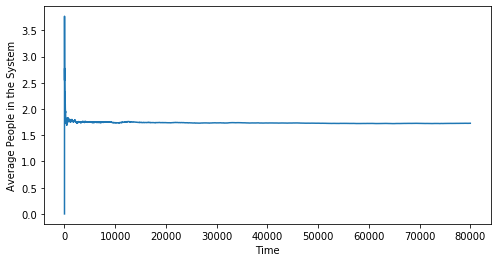

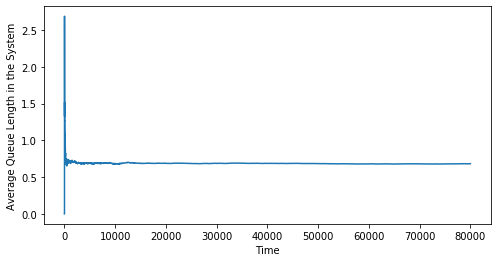

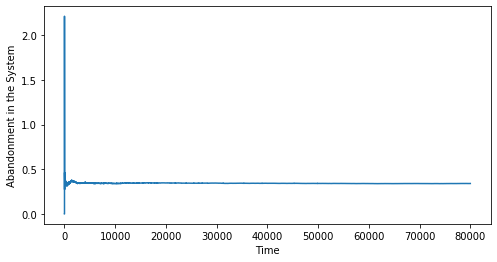

<Figure size 432x288 with 0 Axes>

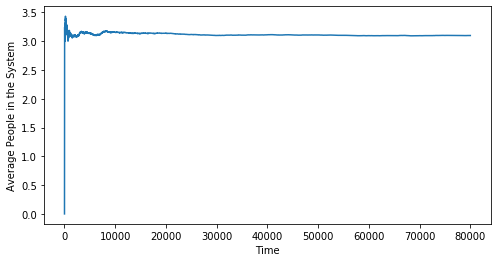

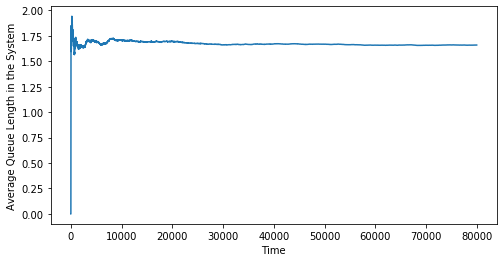

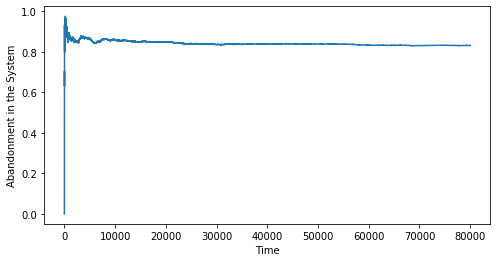

<Figure size 432x288 with 0 Axes>

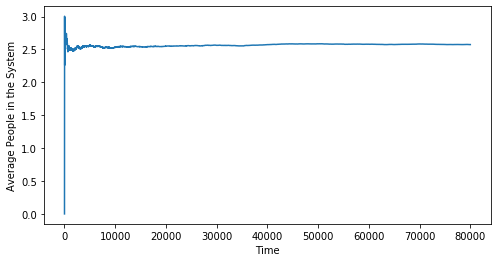

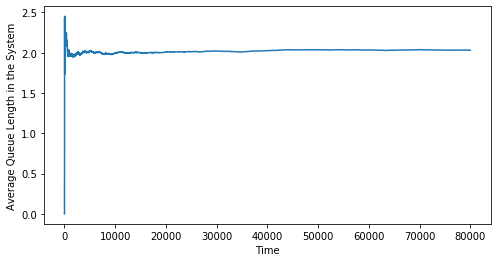

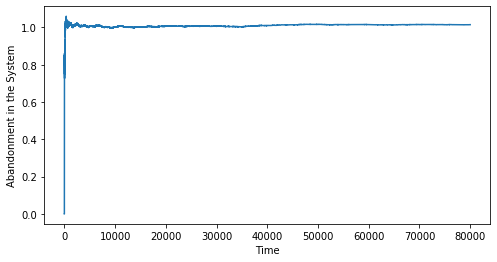

<Figure size 432x288 with 0 Axes>

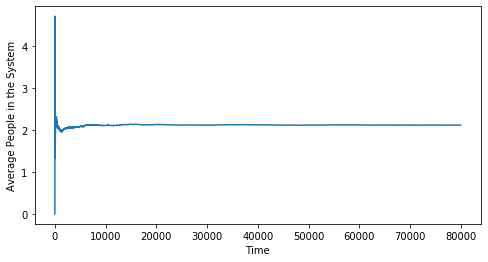

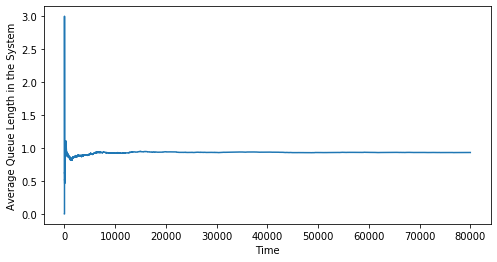

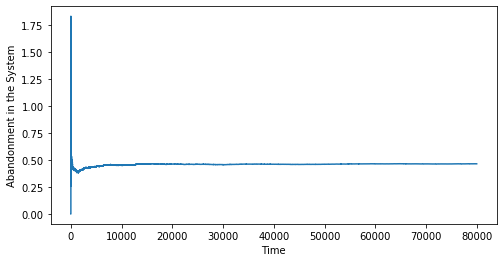

In [10]:
warmup_iterations(1, 80000)

<Figure size 432x288 with 0 Axes>

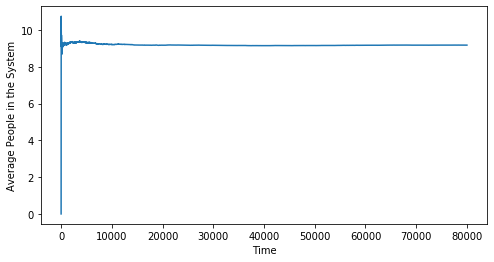

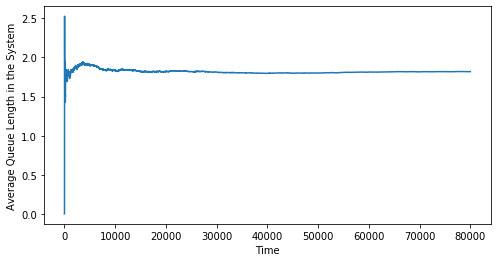

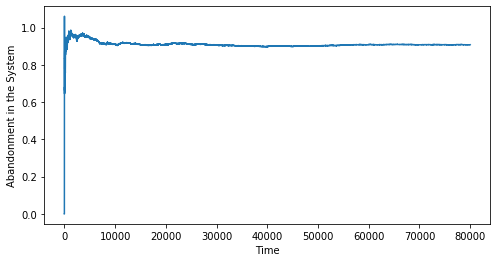

<Figure size 432x288 with 0 Axes>

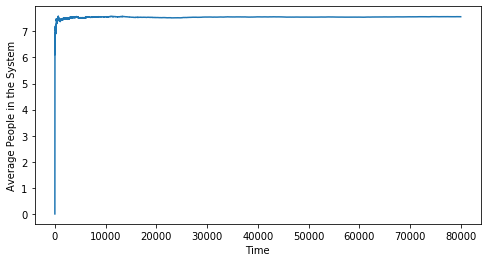

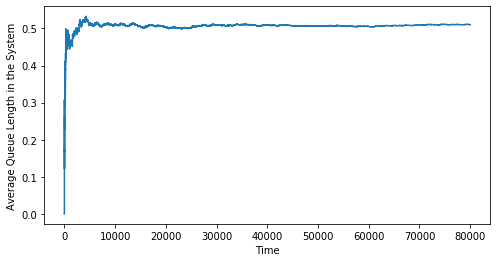

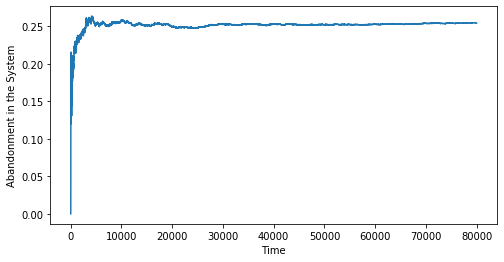

<Figure size 432x288 with 0 Axes>

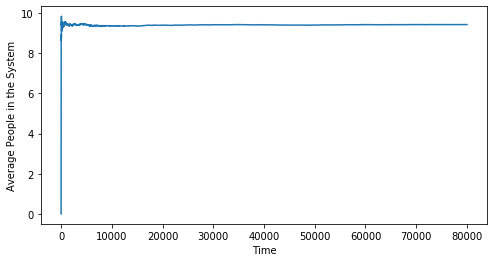

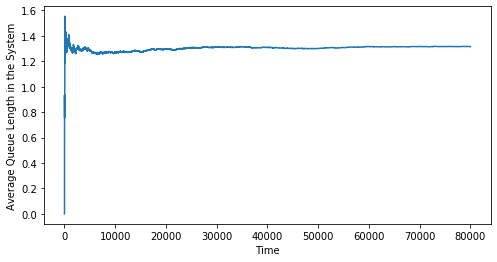

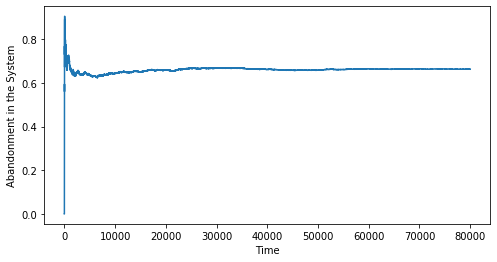

<Figure size 432x288 with 0 Axes>

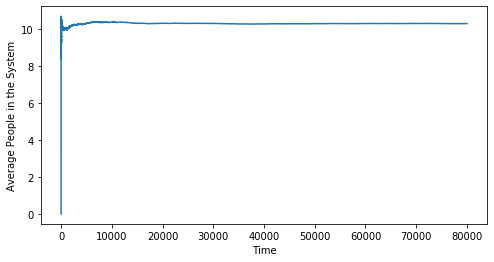

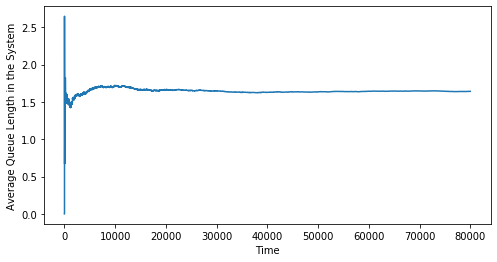

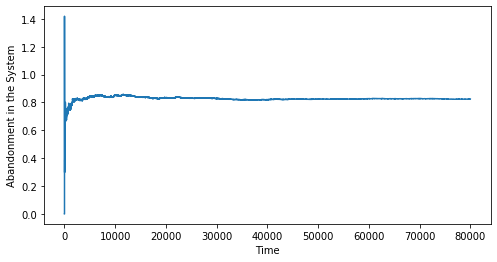

<Figure size 432x288 with 0 Axes>

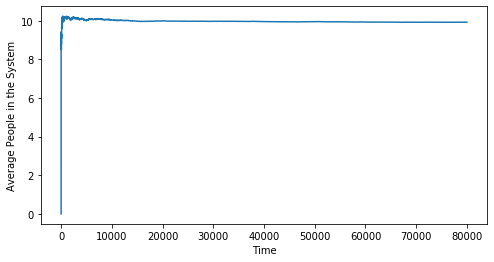

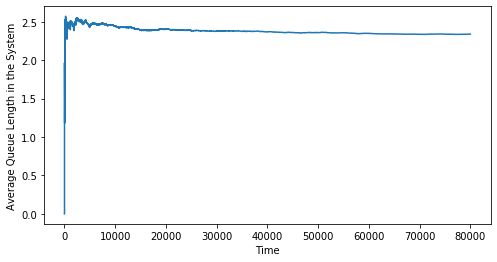

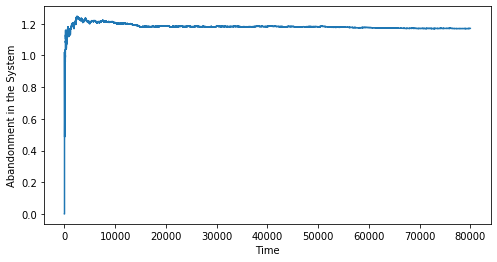

<Figure size 432x288 with 0 Axes>

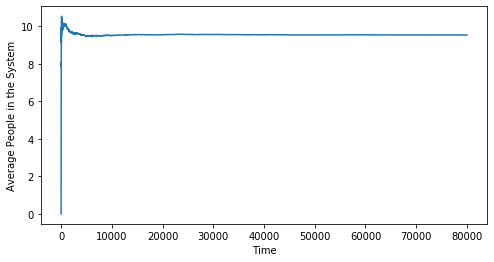

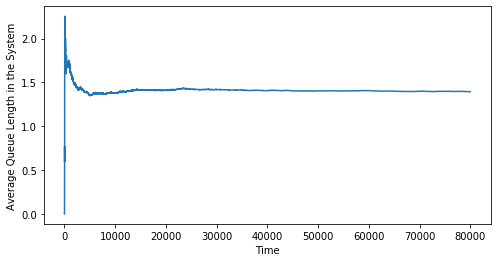

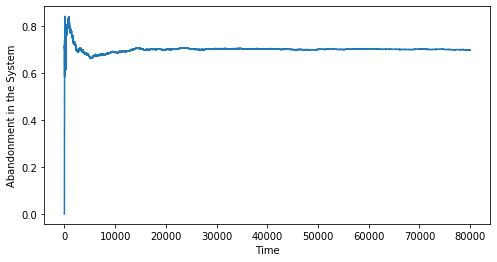

<Figure size 432x288 with 0 Axes>

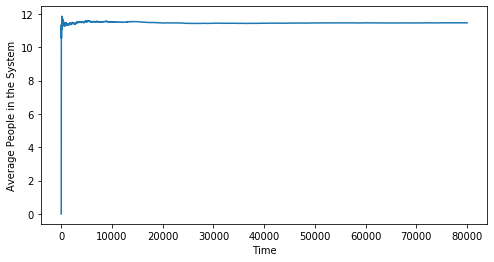

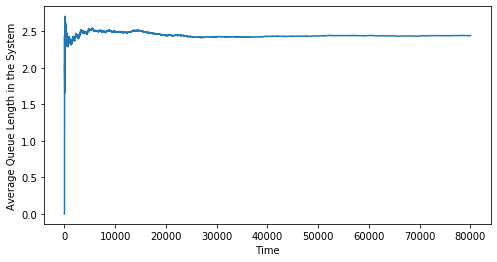

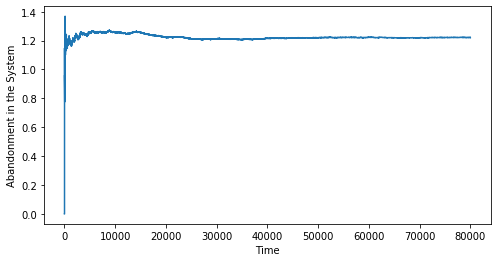

<Figure size 432x288 with 0 Axes>

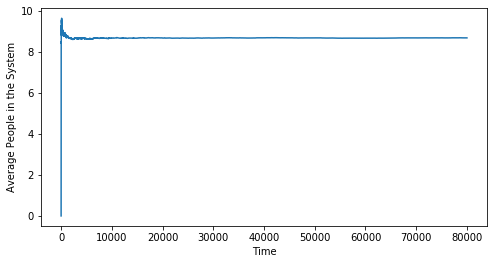

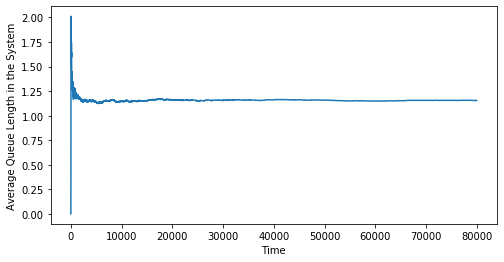

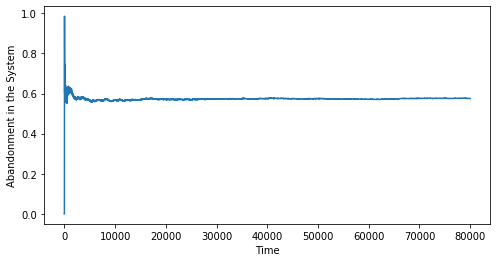

<Figure size 432x288 with 0 Axes>

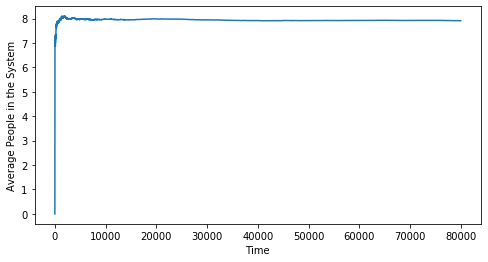

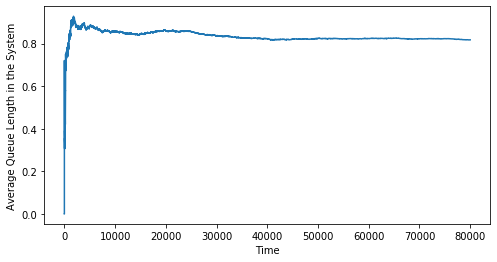

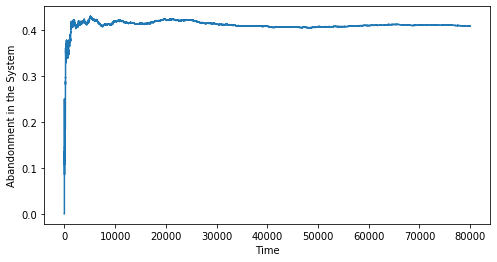

<Figure size 432x288 with 0 Axes>

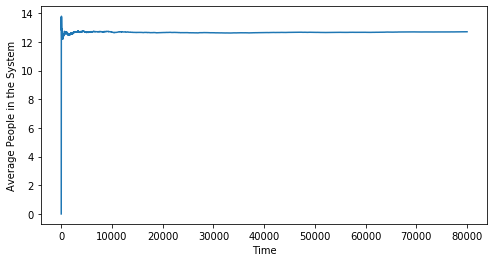

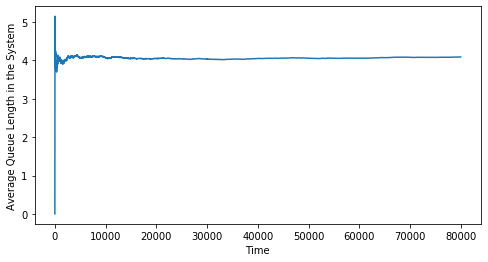

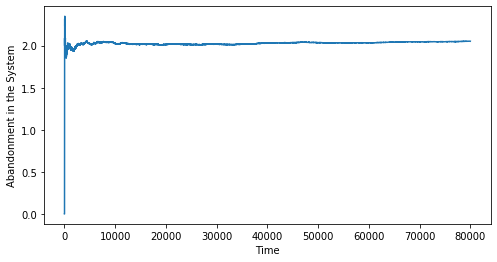

In [11]:
warmup_iterations(5, 80000)

<Figure size 432x288 with 0 Axes>

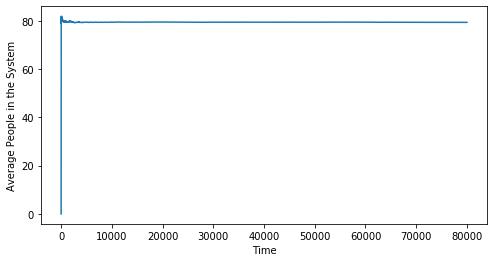

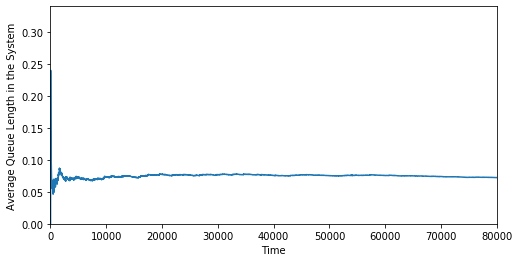

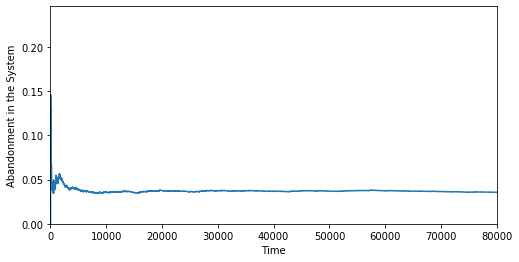

<Figure size 432x288 with 0 Axes>

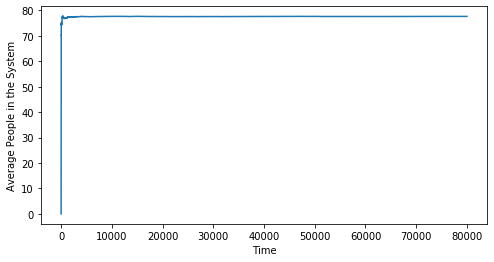

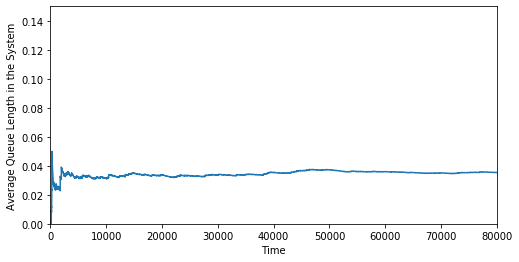

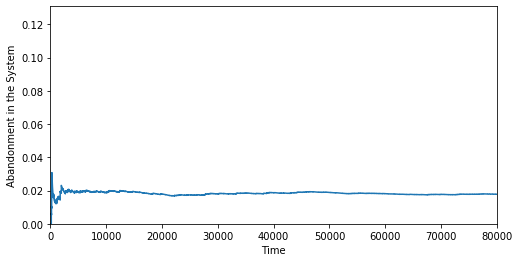

<Figure size 432x288 with 0 Axes>

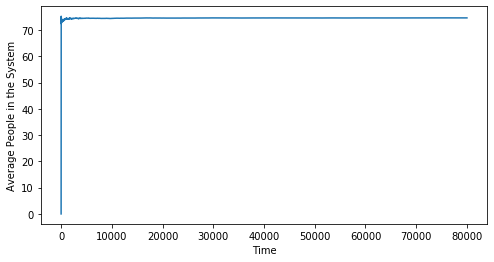

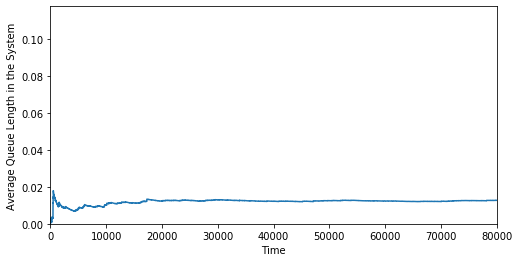

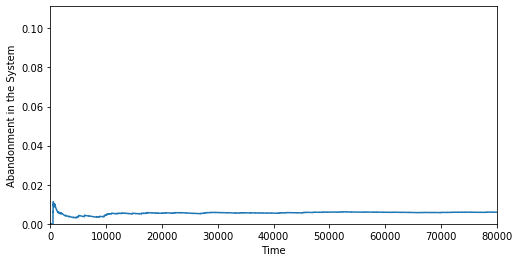

<Figure size 432x288 with 0 Axes>

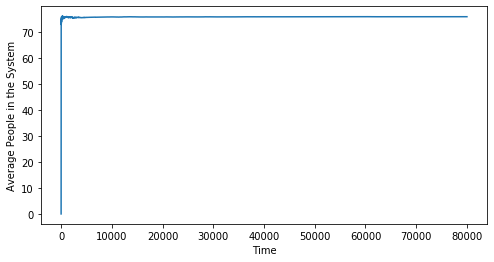

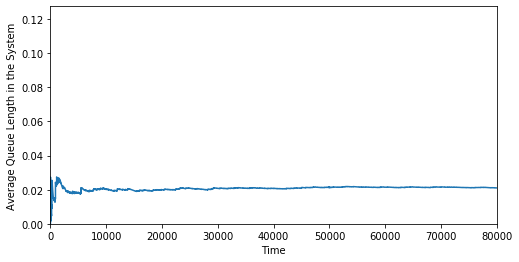

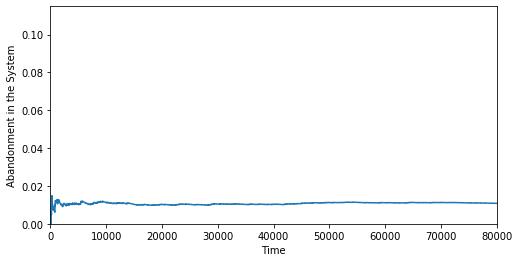

<Figure size 432x288 with 0 Axes>

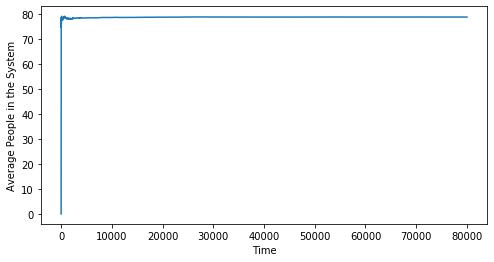

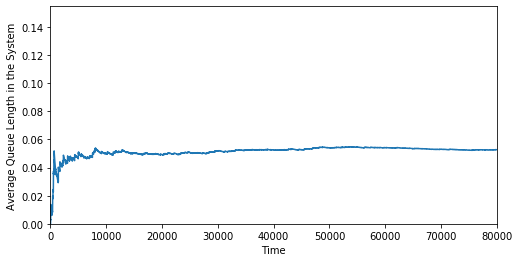

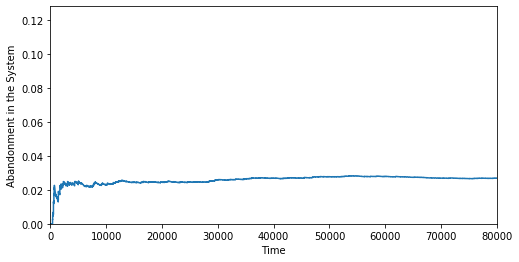

In [54]:
warmup_iterations(50, 80000)

### Testing the optimal Intercepts

In [55]:
def FCFSR_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    # Change order
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/(2*len(servicerate_1))
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    

    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [56]:
def Edit_Entry(x):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Waited = x[1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Queue_Fraction = x[8])
    new_entry.update( Avg_People = x[7])
    new_entry.update( Entries = x[9])
    new_entry.update( Avg_serv_rate = x[11])
    new_entry.update( Pool_1 = x[-10]-x[-8])
    new_entry.update( Pool_2 = x[-8])
    new_entry.update( Pool_3 = x[-9]-x[-8])
    return new_entry

In [57]:
intercepts = [[0,0], [0.5, -0.5],[1, -1], [0.25, -0.25], [0.1,-0.1], [1.25, -1.25], [0.75, -0.75], [0.75, -1.25], [1.25, -0.75], [2, -2], [1.75, -1.75],[1.5, -1.5]] 
interceptmatrix = pd.DataFrame ()
l_results = []
serv_rate_2 = []
serv_rate_1 = []

free_servers = []
for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)}) 
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0,2)})
    serv_rate_1.append(servicerate_1)    
    serv_rate_2.append(servicerate_2)
    
    for elements in intercepts:
        b = elements[0]
        d = elements[1]
        result = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 80000, 1, b, 1, d)
        print("complete", elements)
        l_results.append(result)
        entry = Edit_Entry(result)
        entry.update( Intercepts =  "("+str(b)+","+str(d)+")")
        interceptmatrix = interceptmatrix.append(entry, ignore_index = True)
    print("iteration", i)
        

complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [0.1, -0.1]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [0.75, -1.25]
complete [1.25, -0.75]
complete [2, -2]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 0
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [0.1, -0.1]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [0.75, -1.25]
complete [1.25, -0.75]
complete [2, -2]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 1
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [0.1, -0.1]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [0.75, -1.25]
complete [1.25, -0.75]
complete [2, -2]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 2
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [0.1, -0.1]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [0.75, -1.25]
complete [1.25, -0.75]
complete [2, -2]
comp

In [76]:
interceptmatrix.sort_values("Served")

,Abandoned,Avg_People,Avg_Queue,Avg_serv_rate,Entries,Intercepts,Pool_1,Pool_2,Pool_3,Queue_Fraction,Served,Utilization,Waited,Waiting_Time_A,Waiting_Time_S
177,2776052.0,169.384754,69.385788,0.878542,7997591.0,"(2,-2)",0.0,100.0,0.0,0.405166,5221449.0,0.999990,7997404.0,0.411834,0.844125
178,2233954.0,155.831158,55.832196,0.878542,8004533.0,"(1.75,-1.75)",2.0,96.0,2.0,0.352540,5770522.0,0.999990,8004106.0,0.328857,0.646719
129,2082171.0,152.130172,52.131573,0.939242,8000489.0,"(2,-2)",0.0,100.0,0.0,0.336616,5918243.0,0.999986,7999643.0,0.307130,0.596629
81,1982748.0,149.548329,49.549835,0.932770,8000889.0,"(2,-2)",0.0,100.0,0.0,0.324863,6018054.0,0.999985,7999413.0,0.292705,0.562240
45,1981363.0,149.502408,49.503976,0.965361,8003606.0,"(2,-2)",0.0,100.0,0.0,0.324576,6022185.0,0.999984,8002037.0,0.292858,0.561266
46,1860577.0,146.510048,46.512394,0.965361,7998699.0,"(1.75,-1.75)",0.0,99.0,1.0,0.310548,6138094.0,0.999977,7995219.0,0.276406,0.522428
130,1777640.0,144.400445,44.404068,0.939242,8000144.0,"(1.75,-1.75)",0.0,98.0,2.0,0.300324,6222452.0,0.999964,7993858.0,0.264770,0.495246
70,1723847.0,143.066286,43.070783,0.947370,7995531.0,"(1.75,-1.75)",0.0,100.0,0.0,0.293585,6271643.0,0.999955,7987478.0,0.258075,0.478467
69,1723680.0,143.091260,43.095060,0.947370,7997531.0,"(2,-2)",0.0,100.0,0.0,0.293768,6273799.0,0.999962,7990345.0,0.257844,0.478680
165,1689128.0,142.164699,42.170672,0.969872,8002284.0,"(2,-2)",0.0,100.0,0.0,0.289135,6313093.0,0.999940,7992386.0,0.252655,0.466786


In [124]:
top_matrix["Average People"] = top_matrix ['Avg_People']

C:\Users\s2002098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


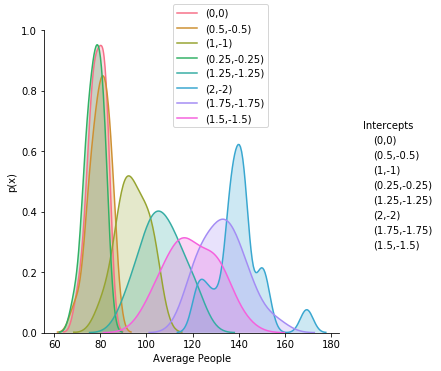

In [125]:
g = sns.pairplot(top_matrix, hue='Intercepts', palette='husl', vars = ['Average People'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)


Analyzing the best pooling strategy for a random call and FCFS system set up. In essence, the observation yields that larger "specialization" pools perform much more optimally then setting up smaller ones i.e. when the intercept is (1.75,-1.75) 

Although it appears as though implementing a completely segregate system, investigating this more yields:

The worse performance observered throughout all iteration is when the system is pooled together as a V system with intercept (2,2). Also seperating the W design into two seperae systems is evident to also not perform optimally 
However as average servage rate increase the advantages of pooling seem to converge

In [127]:
top = [ '(0,0)', '(0.5,-0.5)', '(0.25,-0.25)']
top_matrix = interceptmatrix[interceptmatrix["Intercepts"].isin(top)]

In [157]:
def plot(X, Y, hue, Y_1, matrix, x_label ,y_label, y_label_2 ):
    fig, axes = plt.subplots(1,2, figsize=(12, 6))
    ax_1 = sns.scatterplot(x = X, y = Y, data = matrix, hue = hue, style = hue, ax = axes[0], alpha = 1)
    ax_1.set(xlabel = x_label , ylabel = y_label)
    ax_2 =sns.scatterplot(x = X, y = Y_1, data = matrix,hue = hue, ax = axes[1], style = hue, alpha = 1)
    ax_2.set(xlabel = x_label , ylabel = y_label_2)
    plt.close(2)

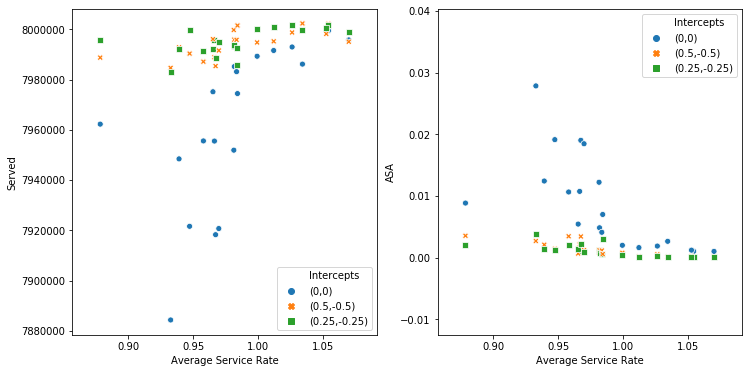

In [178]:
plot("Avg_serv_rate","Served", "Intercepts","Waiting_Time_S",  top_matrix, "Average Service Rate" ,"Served", "ASA")

In [278]:
def comparing_iteratively(measure, matrices, N, labels, x, xlabel, title):
    fig = plt.figure()
    plt.figure(figsize=(12,6))
    ax = plt.subplot(111)
    
    for i in range(len(matrices)):
        ax.plot(x, matrices[i][measure],  label=labels[i])

    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel("ASA", fontsize =  12)
    plt.title( label = title, fontsize =  15)
    ax.legend(fontsize = 12)
    plt.axis()
    plt.show 
    
    
    
m_2 = interceptmatrix[interceptmatrix["Intercepts"] == '(0.25,-0.25)']
m_5 =  interceptmatrix[interceptmatrix["Intercepts"] == '(0.5,-0.5)']
m_0 =  interceptmatrix[interceptmatrix["Intercepts"] == '(0,0)']

m = [m_2,m_5, m_0]
label = ["(0.25, -0.25)", "(0.5, -0.5)", "(0,0)"]

# Different intercept per route 

USING FASTERST SERVER TO SHOW THAT SOLUTION WITH MORE POOLED IS MORE FAVOURED.

In [79]:
def FastR_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
            
                    if servicerate_1[s] > servicerate_2[s] and len(type_1)>0:
                        next_served = type_1[0]
                
                    elif servicerate_2[s] > servicerate_1[s] and len(type_2)>0:
                        next_served = type_2[0]
                    else:
                        next_served = Queue_name[0]
                    
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
    
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [297]:
intercepts = [[0,0], [0.5, -0.5],[1, -1], [0.25, -0.25], [1.25, -1.25], [0.75, -0.75], [1.75, -1.75],[1.5, -1.5]] 
interceptmatrix_fast = pd.DataFrame ()

free_servers = []
for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,10):
    
    for server in free_servers:
        servicerate_1.update({ server : serv_rate_1[i][server]}) 

    for server in free_servers:
        servicerate_2.update({ server : serv_rate_2[i][server]})

    for elements in intercepts:
        b = elements[0]
        d = elements[1]
        result = FastR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 80000, 1, b, 1, d)
        print("complete", elements)
        entry = Edit_Entry(result)
        entry.update( Intercepts =  "("+str(b)+","+str(d)+")")
        interceptmatrix_fast = interceptmatrix_fast.append(entry, ignore_index = True)
    print("iteration", i)
        

complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 0
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 1
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 2
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 3
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
complete [0.75, -0.75]
complete [1.75, -1.75]
complete [1.5, -1.5]
iteration 4
complete [0, 0]
complete [0.5, -0.5]
complete [1, -1]
complete [0.25, -0.25]
complete [1.25, -1.25]
compl

In [292]:
inp = interceptmatrix_fast[['Abandoned', 'Avg_People', 'Avg_Queue',
       'Intercepts', 'Served','Utilization', 'Waited', 'Waiting_Time_A', 'Waiting_Time_S' ]]

# Determining optimal gradient

### Add intercepts here 

In [84]:
# Determine intercepts
intercepts = [[1.25, 0.5, 1.25, -1],[1.5, 0.5, 1.5, -1.5],[1.5, 0.75, 1.5, -1.75],[1.5, 0.25, 1.5, -1.25], [1.25, 0.25, 1.25, -.75], [1.5, 0.75, 1.5, -1.75], [0.75, 0.5, 0.75, -0.5], [1, 0.25, 1, -0.25],  [0.75, 0.25, 0.75, -0.25]]


interceptmatrix_g = pd.DataFrame ()
free_servers = []
for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    for server in free_servers:
        servicerate_1.update({ server : serv_rate_1[i][server]}) 

    for server in free_servers:
        servicerate_2.update({ server : serv_rate_2[i][server]})
    serv_rate_1.append(servicerate_1)    
    serv_rate_2.append(servicerate_2)
    
    for elements in intercepts:
        a = elements[0]
        b = elements[1]
        c = elements[2]
        d = elements[3]
        result = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 80000, a, b, c, d)
        print("complete", elements)
        entry = Edit_Entry(result)
        entry.update( Intercepts =  "("+ str(a)+"," +str(b)+","+str(c)+ ","+str(d)+")")
        interceptmatrix_g = interceptmatrix_g.append(entry, ignore_index = True)
    print("iteration", i)
        

complete [1.25, 0.5, 1.25, -1]
complete [1.5, 0.5, 1.5, -1.5]
complete [1.5, 0.75, 1.5, -1.75]
complete [1.5, 0.25, 1.5, -1.25]
complete [1.25, 0.25, 1.25, -0.75]
complete [1.5, 0.75, 1.5, -1.75]
complete [0.75, 0.5, 0.75, -0.5]
complete [1, 0.25, 1, -0.25]
complete [0.75, 0.25, 0.75, -0.25]
iteration 0
complete [1.25, 0.5, 1.25, -1]
complete [1.5, 0.5, 1.5, -1.5]
complete [1.5, 0.75, 1.5, -1.75]
complete [1.5, 0.25, 1.5, -1.25]
complete [1.25, 0.25, 1.25, -0.75]
complete [1.5, 0.75, 1.5, -1.75]
complete [0.75, 0.5, 0.75, -0.5]
complete [1, 0.25, 1, -0.25]
complete [0.75, 0.25, 0.75, -0.25]
iteration 1
complete [1.25, 0.5, 1.25, -1]
complete [1.5, 0.5, 1.5, -1.5]
complete [1.5, 0.75, 1.5, -1.75]
complete [1.5, 0.25, 1.5, -1.25]
complete [1.25, 0.25, 1.25, -0.75]
complete [1.5, 0.75, 1.5, -1.75]
complete [0.75, 0.5, 0.75, -0.5]
complete [1, 0.25, 1, -0.25]
complete [0.75, 0.25, 0.75, -0.25]
iteration 2
complete [1.25, 0.5, 1.25, -1]
complete [1.5, 0.5, 1.5, -1.5]
complete [1.5, 0.75, 1.

In [187]:
i.sort_values("Served")

,Abandoned,Avg_People,Avg_Queue,Intercepts,Served,Utilization,Waited,Waiting_Time_A,Waiting_Time_S
62,370436.0,88.273408,9.270502,"(0.75,0.25,0.75,-0.25)",7631391.0,0.790029,3325742.0,0.165480,0.089150
128,296831.0,104.569858,7.412272,"(1.5,0.75,1.5,-1.75)",7696122.0,0.971576,5053280.0,0.092665,0.073475
131,297202.0,104.604594,7.453995,"(1.5,0.75,1.5,-1.75)",7701774.0,0.971506,5056582.0,0.093575,0.073815
47,201069.0,100.769276,5.032668,"(1.5,0.75,1.5,-1.75)",7796201.0,0.957366,4074139.0,0.081385,0.049543
50,202719.0,100.803724,5.060473,"(1.5,0.75,1.5,-1.75)",7797717.0,0.957433,4085911.0,0.081799,0.049791
74,192214.0,100.499038,4.789295,"(1.5,0.75,1.5,-1.75)",7804033.0,0.957097,3988797.0,0.079439,0.047139
77,193763.0,100.640851,4.857696,"(1.5,0.75,1.5,-1.75)",7807759.0,0.957832,4035663.0,0.079668,0.047796
113,175858.0,99.887102,4.384548,"(1.5,0.75,1.5,-1.75)",7825746.0,0.955026,3819072.0,0.076405,0.043105
110,175405.0,99.809503,4.363849,"(1.5,0.75,1.5,-1.75)",7826417.0,0.954457,3793809.0,0.076894,0.042883
95,165237.0,99.369753,4.119477,"(1.5,0.75,1.5,-1.75)",7831920.0,0.952503,3677218.0,0.074610,0.040505


In [ ]:
i = interceptmatrix_g[['Abandoned', 'Avg_People', 'Avg_Queue',
       'Intercepts', 'Served', 'Utilization', 'Waited', 'Waiting_Time_A', 'Waiting_Time_S']]

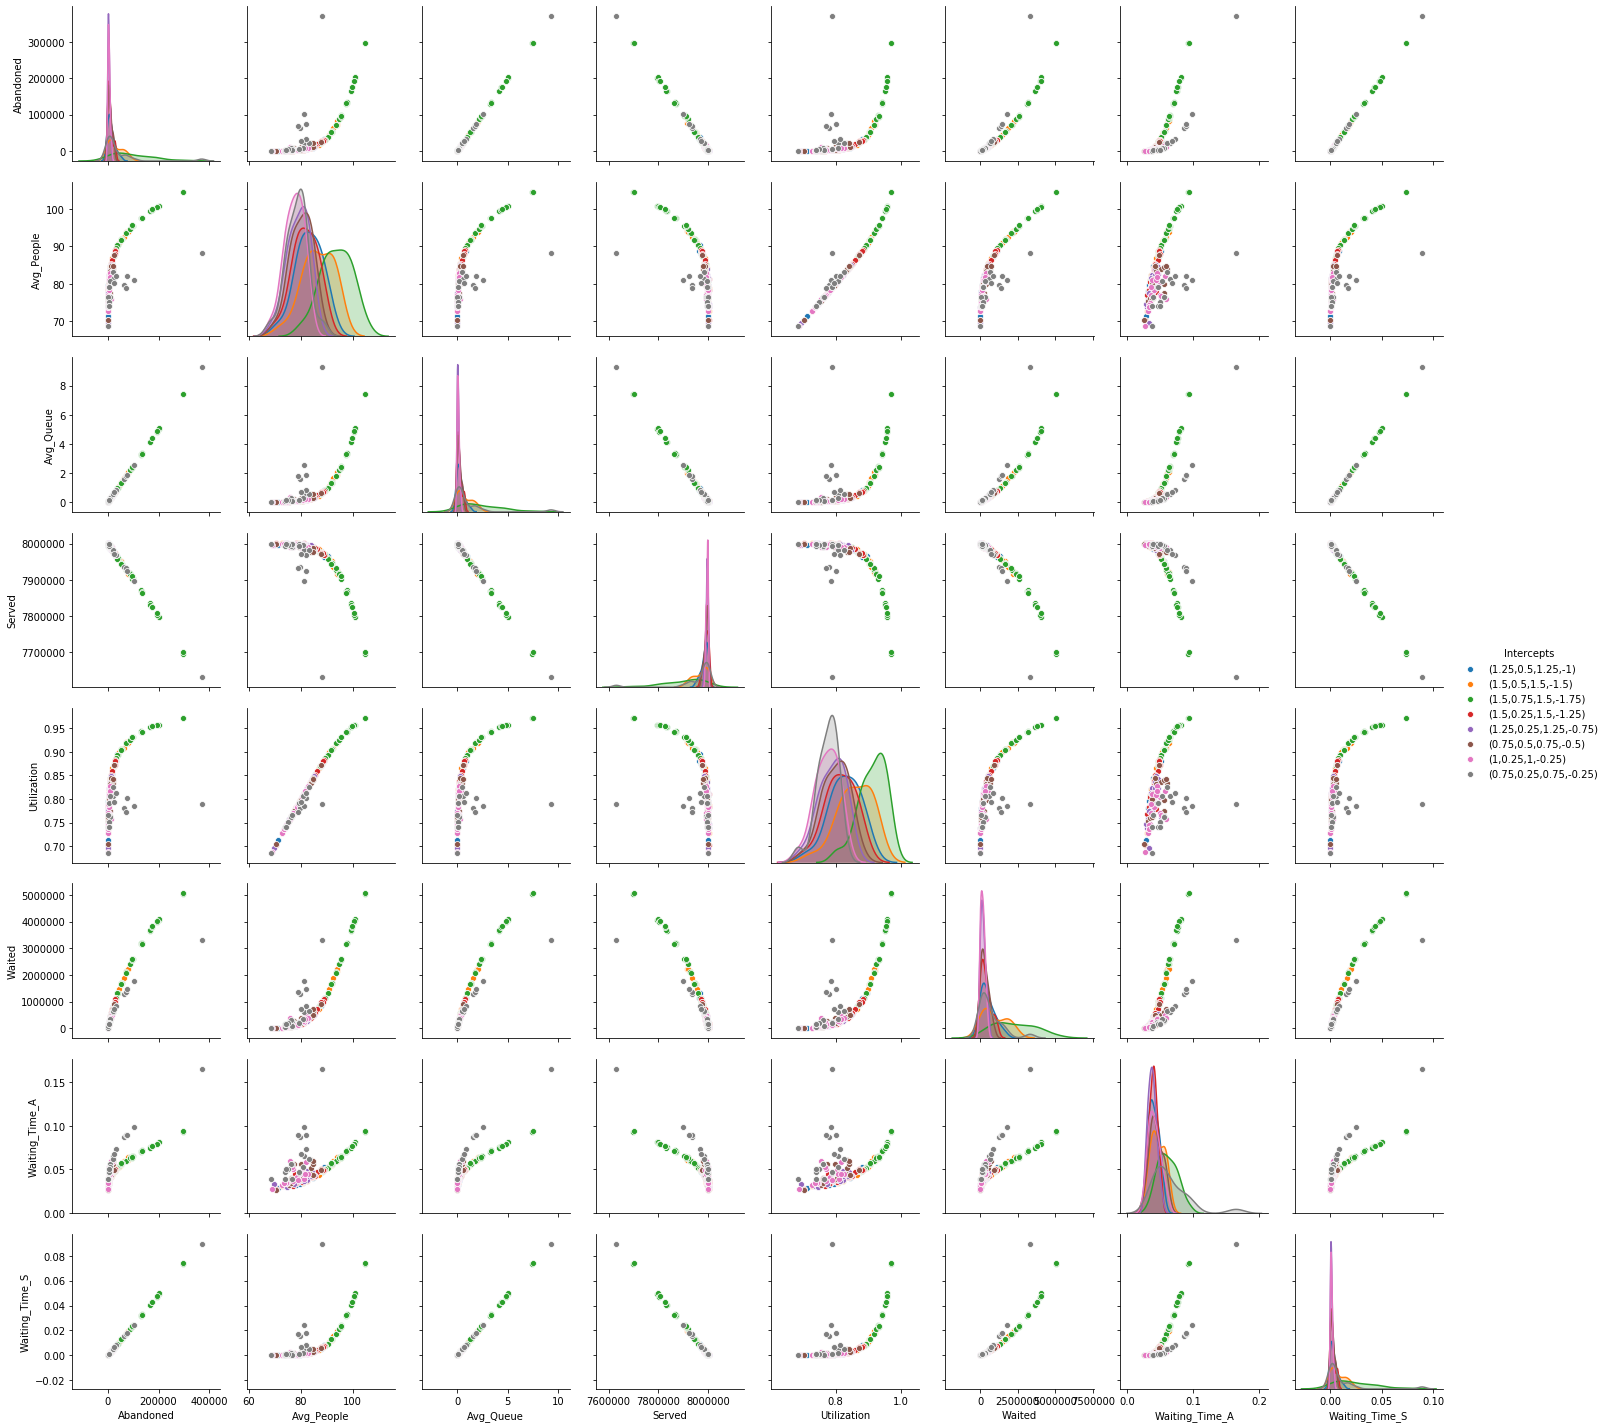

In [184]:
sns.pairplot(i , hue ='Intercepts' )

C:\Users\s2002098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


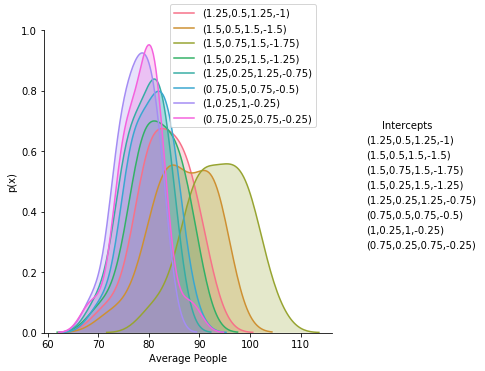

In [227]:
i["Average People"] = i ['Avg_People']

g = sns.pairplot(i, hue='Intercepts', palette='husl', vars = ['Average People'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

Text(0.5, 0, 'Served')

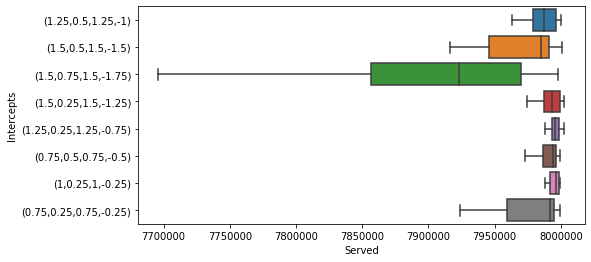

In [260]:
plt.figure(figsize=(8,4))
top = interceptmatrix_g["Intercepts"].unique()
top_matrix = interceptmatrix_g[interceptmatrix_g["Intercepts"].isin(top)]

ax = sns.boxplot(x="Served", y="Intercepts", data=top_matrix, showfliers = False)
plt.ylabel("Intercepts", size=10)
plt.xlabel("Served", size=10)

In [261]:
top = [ '(1.5,0.25,1.5,-1.25)', '(1.25,0.25,1.25,-0.75)',
       '(0.75,0.5,0.75,-0.5)', '(1,0.25,1,-0.25)']
top_matrix = interceptmatrix_g[interceptmatrix_g["Intercepts"].isin(top)]

Text(0.5, 0, 'ASA')

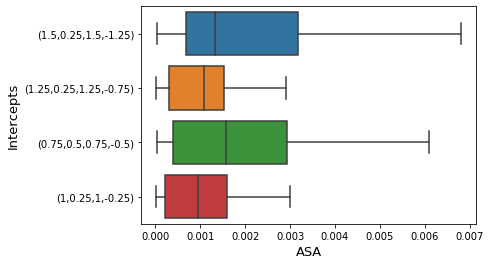

In [265]:
ax = sns.boxplot(x="Waiting_Time_S", y="Intercepts", data=top_matrix, showfliers = False)

plt.ylabel("Intercepts", size=13)
plt.xlabel("ASA", size=13)

Text(0.5, 0, 'Utilization')

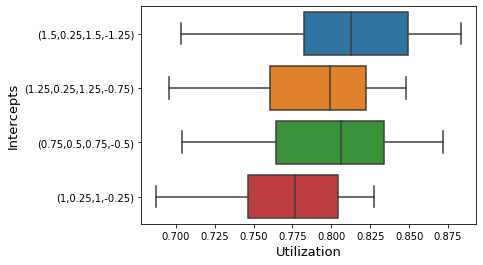

In [266]:
ax = sns.boxplot(x="Utilization", y="Intercepts", data=top_matrix, showfliers = False)
plt.ylabel("Intercepts", size=13)
plt.xlabel("Utilization", size=13)

In [280]:
m_2 = interceptmatrix_g[interceptmatrix_g["Intercepts"] == '(1.5,0.25,1.5,-1.25)']
m_5 =  interceptmatrix_g[interceptmatrix_g["Intercepts"] == '(1.25,0.25,1.25,-0.75)']
m_0 =  interceptmatrix_g[interceptmatrix_g["Intercepts"] == '(0.75,0.5,0.75,-0.5)']
m_33 =  interceptmatrix_g[interceptmatrix_g["Intercepts"] == '(1,0.25,1,-0.25)']

m = [m_2,m_5, m_0, m_33]
label =  [ '(1.5,0.25,1.5,-1.25)', '(1.25,0.25,1.25,-0.75)','(0.75,0.5,0.75,-0.5)', '(1,0.25,1,-0.25)']


<Figure size 432x288 with 0 Axes>

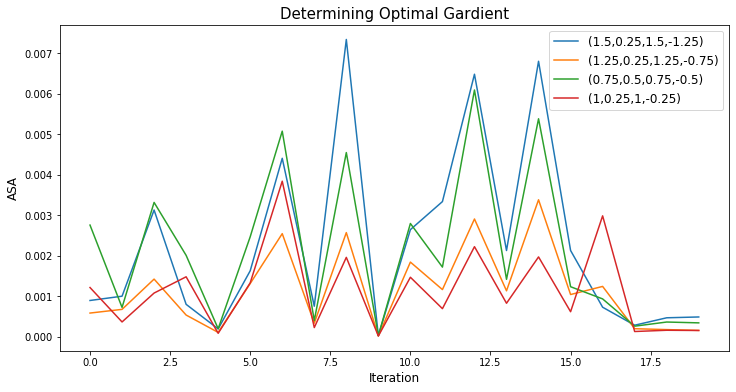

In [283]:
comparing_iteratively("Waiting_Time_S", m, 20, label, [i for i in range(20)], "Iteration","Determining Optimal Gardient")

However, how well the system peprforms does depend on system state and thus it cannot be guaranteed that in all cases, this will be the optimal selection, consider the above graph. 

# Differenet Variance and pooling 

In [85]:
intercepts = [[0.5, -0.5], [0.25, -0.25],[0.5, -0.25], [0.1, -0.25], [0.75, -0.5], [0.25, -0.5], [1,-1]] 
interceptmatrix_var = pd.DataFrame ()


free_servers = []
for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)}) 
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0.6,1.4)})

    for elements in intercepts:
        b = elements[0]
        d = elements[1]
        result = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 80000, 1, b, 1, d)
        print("complete", elements)
        entry = Edit_Entry(result)
        entry.update( Intercepts =  "("+str(b)+","+str(d)+")")
        interceptmatrix_var = interceptmatrix_var.append(entry, ignore_index = True)
    print("iteration", i)
        

complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 0
complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 1
complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 2
complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 3
complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 4
complete [0.5, -0.5]
complete [0.25, -0.25]
complete [0.5, -0.25]
complete [0.1, -0.25]
complete [0.75, -0.5]
complete [0.25, -0.5]
complete [1, -1]
iteration 5
complete [0.5, -0.5]
complete [0.2